# Assignment 4: Theory of NNs (20pts)

In this homework, we will explore the basics of neural networks.

## Conda Setup

Generate the conda environment by running in the terminal:

`conda create --name gcv_exercise_4 python=3.11`

Run to activate environment:

`conda activate gcv_exercise_4`

Install all required packages for this exercise by running:

`conda install matplotlib numpy scikit-image scikit-learn tqdm`

Install Jupyter Notebook requirements:

`conda install -n gcv_exercise_4 ipykernel --update-deps --force-reinstall`

(Optional) If you are working on the TUWEL Juypter Notebooks:

`ipython kernel install --name "GCV_E_4" --user`

## Notebook Setup & Imports

In [120]:
# Setup

# The Random module implements pseudo-random number generators
import math
import random 
from random import randint
from tqdm import tqdm
# Numpy is the main package for scientific computing with Python. 
# This will be one of our most used libraries in this class
import numpy as np

# Import the Scikit-Image and -Learn library
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from skimage.transform import resize
from PIL import Image 
# Matplotlib is a useful plotting library for python 
import matplotlib.pyplot as plt

# This code is to make matplotlib figures appear inline in the
# notebook rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

# set random seeds
np.random.seed(42)
random.seed(42)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Part 1: Perceptron (8 Pts)

The perceptron is one of the simplest and oldest algorithms in machine learning. It is a type of artificial neural network that was introduced by Frank Rosenblatt. The perceptron is used for binary classification problems where the goal is to separate two classes of data using a linear boundary. The algorithm updates the weights of the inputs to adjust the boundary until the correct classification is achieved.

### Dataset

We use a similar dataset to exercise 3, however, as the perceptron can only seperate 2 classes we will only use 2 centers.

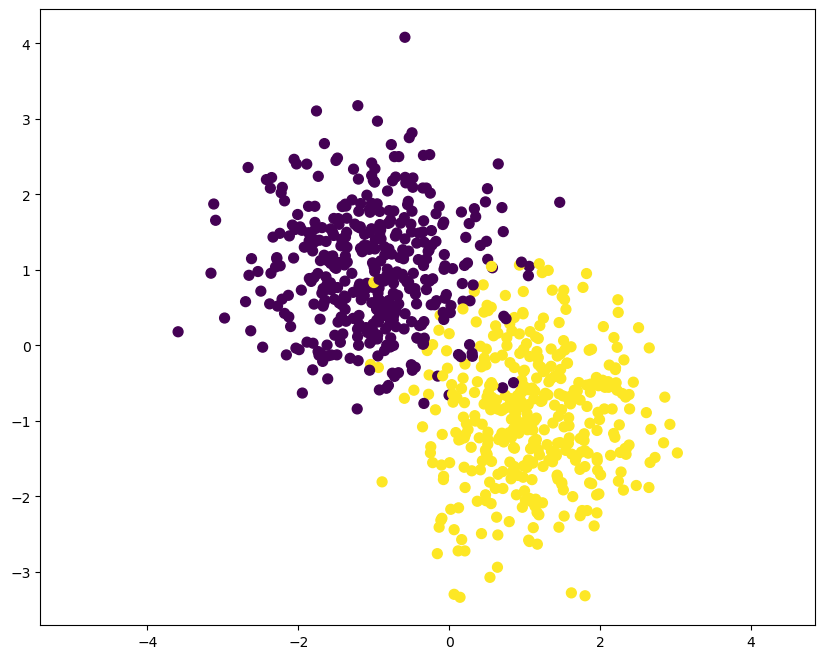

In [121]:
# Generate random data points for clustering
n_samples = 800
centers = [[-1, 1], [1, -1]]
std = 0.8

#generate dataset
X_in, y_in = make_blobs(n_samples=n_samples, centers=centers, cluster_std=std, random_state=42)


#split dataset
X_train, X_val, y_train, y_val = train_test_split(X_in, y_in, test_size=0.3, stratify=y_in, random_state=42)
# Plot data points
plt.scatter(X_in[:, 0], X_in[:, 1], c=y_in, s=50, cmap='viridis')
plt.axis('equal')
plt.show()

### Perceptron Implementation

Here you will implement the:

- Perceptron (`predict()`)
- Perceptron weight update (`fit()`)

Function Description (`predict()`)

The predict function should implement the perceptron algorithm for predicting the class labels of input vectors. The function takes as input a numpy ndarray X of shape (n_samples, n_features) and uses the weight vector self.w to compute the output of the perceptron for each sample. The output of the perceptron for each sample is computed as the dot product of the sample and the weight vector self.w, then the bias term self.bias is added. Finally, the function applies a step function to the output to obtain the predicted class label for each sample. The step function returns 0 for all values less than or equal to zero and 1 for all values greater than zero. The predicted class labels should be returned as a numpy ndarray of shape (n_samples,).

Function Description (`fit()`)

The fit function should implement the training algorithm for the single layer perceptron. The function initializes the weight vector self.w and bias term self.bias with zeros and then loops through the specified number of iterations (epochs). In each epoch, the function calculates the predictions for all samples in X using the prediction method, and then compares them with the ground truth labels y to calculate the prediction error. The function should update the weights and bias using the perceptron learning rule. After each epoch, the function appends the number of misclassifications to a list miss_classifications. Finally, the function should return the miss_classifications list.

In [122]:

class Perceptron:
    """Implements the single layer perceptron.
    """
    def __init__(self, lr=0.01, n_iterations=1000):
        """Initialize perceptron with learning rate and epochs.

        Args:
            lr (float): Learning rate
            n_iterations (int): Number of training epochs
            
        Attributes:
            weights (numpy.ndarray): Weights of the perceptron
            bias (int): Bias value of the perceptron

        """
        self.learning_rate = lr
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        """ Training function.

        Args:
            X (numpy.ndarray): Inputs.
            y (numpy.ndarray): labels/target.

        Returns:
            List of the number of miss-classifications per epoch
        """
        # Initialize weights and bias
        num_features = X.shape[1]
        self.weights = np.zeros(num_features)
        self.bias = 0
        miss_class = []

        for _ in tqdm(range(self.n_iterations)):
            # Calculate predictions for all examples at once
            predictions = self.predict(X)

            # Update weights and bias based on prediction errors
            errors = y - predictions
            # *****BEGINNING OF YOUR CODE (DO NOT DELETE THIS LINE)*****
            self.weights += self.learning_rate * np.dot(X.T, errors)
            self.bias += self.learning_rate * errors.sum()
            # *****END OF YOUR CODE (DO NOT DELETE THIS LINE)*****

            
            miss_class.append((errors!=0).sum())
        return miss_class

    def predict(self, X):
        """ Prediction function.

        Args:
            X (numpy.ndarray): Inputs.

        Returns:
            Class label of X
        """
        
        # *****BEGINNING OF YOUR CODE (DO NOT DELETE THIS LINE)*****
        # Calculate the dot product of weights and input features, add bias
        z = np.dot(X, self.weights) + self.bias
        # Apply the step function to get the binary predictions
        # According to perceptron rule, return 1 if z >= 0 else 0
        return np.where(z >= 0, 1, 0)
        # *****END OF YOUR CODE (DO NOT DELETE THIS LINE)*****
       




### Perceptron Training and Visualization

You don't need to change any code here. The code should produce a plot similar to this:

<img src="imgs/example_output_perc.png" alt="Plot" width="960" />

100%|██████████| 1000/1000 [00:00<00:00, 4340.43it/s]



[[115   5]
 [  5 115]]
Accuracy on the testset: 0.9583333333333334


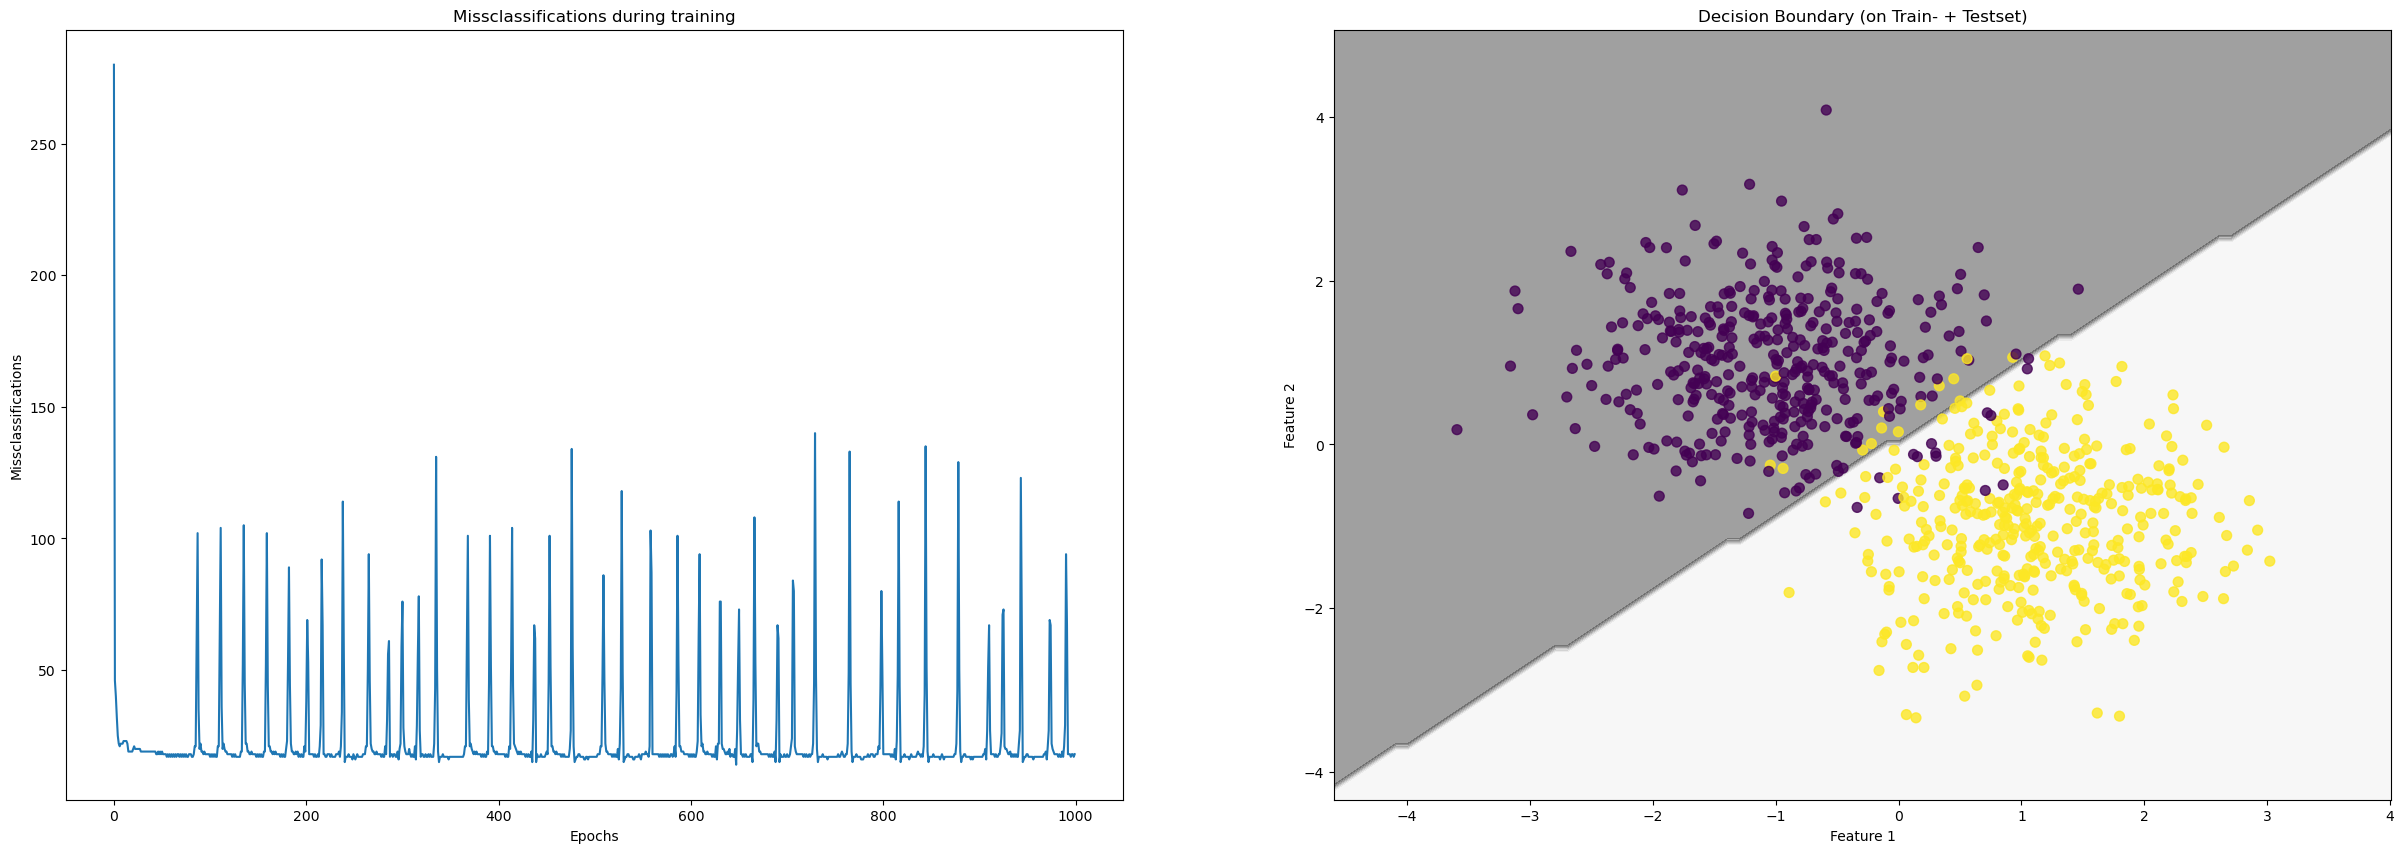

In [123]:
perceptron = Perceptron(lr=0.01)

miss_list = perceptron.fit(X_train, y_train)

y_pred = perceptron.predict(X_val)
cm = confusion_matrix(y_val, y_pred)
print(cm)
acc = accuracy_score(y_val,y_pred)

print("Accuracy on the testset:", acc)

fig, axs = plt.subplots(1, 2, figsize=(30, 10))

axs[0].plot(miss_list)
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Missclassifications')
axs[0].set_title('Missclassifications during training')

# Create grid of points covering entire feature space
xx, yy = np.meshgrid(np.arange(X_in[:,0].min()-1, X_in[:,0].max()+1, 0.1),
                     np.arange(X_in[:,1].min()-1, X_in[:,1].max()+1, 0.1))

# Apply trained perceptron to each point on the grid
Z = perceptron.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
axs[1].contourf(xx, yy, Z, alpha=0.4)
axs[1].scatter(X_in[:, 0], X_in[:, 1], c=y_in, alpha=0.8, s=50, cmap='viridis')
axs[1].set_xlabel('Feature 1')
axs[1].set_ylabel('Feature 2')
axs[1].set_title('Decision Boundary (on Train- + Testset)')
plt.show()

## Part 2: Convolutional Neural Network (12 Pts)



### Loss function and activation function

__Loss Function__:
A loss function, also known as a cost function or objective function, is a measure of how well a machine learning model is performing on a given task. The goal of a machine learning algorithm is to minimize the value of the loss function, which is achieved by adjusting the model's parameters during training. Different types of machine learning problems require different types of loss functions. For example, for a classification task, a common loss function is cross-entropy loss, which measures the difference between the predicted probability distribution and the true distribution of labels. For a regression task, mean squared error (MSE) is a common loss function, which measures the average squared difference between the predicted values and the true values.

__Activation Function__:
An activation function is a mathematical function that is applied to the output of each neuron in a neural network. The purpose of the activation function is to introduce nonlinearity into the model, which allows it to learn more complex patterns in the data. Some common activation functions include the sigmoid function, which maps the input to a value between 0 and 1, and the ReLU (rectified linear unit) function, which returns the input if it is positive and 0 otherwise. Different activation functions can be used in different layers of a neural network, depending on the requirements of the specific task and the architecture of the network. You will implement the sigmoid loss function and its derivative for this lecture.

__Loss functions are out of scope for this exercise and are provided__.

<!DOCTYPE html>
<html>
<head>
  <title>My Page</title>
  <style>
    figure {
      margin: 0;
      padding: 0;
    }

    img {
      display: block;
      margin: auto;
    }

    figcaption {
      font-size: 25px;
      color: #666;
      text-align: center;
      margin-top: 10px;
    }
  </style>
</head>
<body>
<div style="background-color: white;">
  <figure>
    <center><img src="imgs/sigmoid.svg" alt="Plot" width="960" /></center>
    <figcaption>Sigmoid function</figcaption>
  </figure>
</div>
</body>
</html>


In [124]:
class SquareLoss(object):
    
    def __init__(self):
        pass
    
    def loss(self, y, y_pred):
        return 0.5 * np.power((y - y_pred), 2)
    
    def delta(self, y, y_pred):
        return -(y - y_pred)
    
    def calculate_accuracy(self, y_pred, y):
        y_pred = y_pred[:, 0]
        assert y.ndim == 1 and y.size == y_pred.size
        y_pred = y_pred > 0.5
        return (y == y_pred).sum().item() / y.size
    
def sigmoid(x):
    """
    Compute the output of the Sigmoid activation function.
    """
    # *****BEGINNING OF YOUR CODE (DO NOT DELETE THIS LINE)*****
    return  1 / (1+ np.exp(-x))
    # *****END OF YOUR CODE (DO NOT DELETE THIS LINE)*****
    
def sigmoid_derivative(x):
    """
    Compute the derivative of the sigmoid activation function.
    """
    # *****BEGINNING OF YOUR CODE (DO NOT DELETE THIS LINE)*****
    s = sigmoid(x)
    return s * (1 - s)
    # *****END OF YOUR CODE (DO NOT DELETE THIS LINE)*****

### Convolution

You already implemented basic (handcrafted) convolutions in `exercise 2`, now you will implement learned convolutions with a forward pass and a backward pass.In exercise 2, you learned how to perform basic convolutions using pre-defined filters or kernels. In this exercise, you will take it a step further and implement learned convolutions, where the model learns the filters or kernels during training instead of using pre-defined ones.

To do this, you will implement a backward pass for the learned convolution layer. The code for the forward pass is given; it involves taking the input data and passing it through the convolution layer, which applies the learned filters to the input and produces an output feature map. The backward pass involves calculating the gradients of the loss with respect to the input and the parameters of the convolution layer, which allows the weights to be updated during training using backpropagation.

By implementing learned convolutions, the model can learn to extract more complex features from the input data, which can lead to better performance on the task at hand. However, this also means that there are more parameters to learn and optimize during training, which can be computationally expensive and require a lot of training data. 

In this exercise, you won't actually be training the model to convergence. Instead, you will perform a single forward pass and backward pass through the learned convolution layer, and compare the resulting gradients to the expected gradients that are provided to you. This will allow you to verify that your implementation of the convolution layer is correct and that the gradients are being computed accurately. 

#### Implement Part of the Backwardpass for the Convolution-Layer

In [ ]:
class Convolutional:
    """
    A class representing a convolutional layer.

    Attributes:
    -----------
    name: str
        The name of the convolutional layer.
    stride: int, default=1
        The stride of the convolutional layer.
    size: int, default=3
        The size of the filters in the convolutional layer.
    activation: str or None, default=None
        The activation function to apply after the convolution operation.
    last_input: numpy array or None
        The input to the last forward pass through the layer.
    sigmoid: numpy vectorize function
        A vectorized implementation of the sigmoid activation function.
    sigmoid_derivative: numpy vectorize function
        A vectorized implementation of the derivative of the sigmoid activation function.
    filters: numpy array
        The filters for the convolutional layer.

    Methods:
    -------
    forward(image):
        Perform a forward pass through the convolutional layer.
    backward(din, learn_rate):
        Perform a backward pass through the convolutional layer.
    get_weights():
        Return the weights of the convolutional layer.

    Examples:
    ---------
    >>> conv = Convolutional(name='conv_layer')
    >>> conv.forward(np.random.randn(32, 28, 28))
    array([[[...], [...], ... , [...]], [[...], [...], ... , [...]], ... , [[...], [...], ... , [...]]])
    >>> conv.backward(np.random.randn(16, 26, 26), learn_rate=0.001)
    array([[[...], [...], ... , [...]], [[...], [...], ... , [...]], ... , [[...], [...], ... , [...]]])
    >>> conv.get_weights()
    array([...])
    """

    def __init__(self, name, in_channels=16, out_channels=8, stride=1, size=3, activation=False):
        """
        Initializes a new instance of the Convolutional class.

        Args:
            name (str): The name of the convolutional layer.
            in_channels (int): The number of input channels.
            out_channels (int): The number of output channels (filters).
            stride (int): The stride used for the convolution.
            size (int): The size of the filters.
            activation (bool): Defines if the sigmoid activation function is applied.).
        """
        self.name = name
        limit = 1 / math.sqrt(in_channels)
        np.random.seed(42)
        self.filters = np.random.uniform(-limit, limit, (out_channels, in_channels, size, size))
        self.stride = stride
        self.size = size
        self.activation = activation
        self.last_input = None
        self.sigmoid = np.vectorize(sigmoid)
        self.sigmoid_derivative = np.vectorize(sigmoid_derivative)

    def forward(self, image):
        """
        Applies the convolution operation to the input image and returns the output.

        Args:
        -----
        image : numpy.ndarray of shape (n_channels, input_dimension, input_dimension)
            The input image to the convolutional layer.

        Returns:
        --------
        out : numpy.ndarray of shape (n_filters, output_dimension, output_dimension)
            The output of the convolution operation after applying filters to the input image.
        """
        self.last_input = image                             # keep track of last input for later backward propagation

        input_dimension = image.shape[1]                                                # input dimension
        output_dimension = int((input_dimension - self.size) / self.stride) + 1         # output dimension

        out = np.zeros((self.filters.shape[0], output_dimension, output_dimension))     # create the matrix to hold the
                                                                                        # values of the convolution
        for f in range(self.filters.shape[0]):              # convolve each filter over the image,
            tmp_y = out_y = 0                               # moving it vertically first and then horizontally
            while tmp_y + self.size <= input_dimension:
                tmp_x = out_x = 0
                while tmp_x + self.size <= input_dimension:
                    patch = image[:, tmp_y:tmp_y + self.size, tmp_x:tmp_x + self.size]
                    out[f, out_y, out_x] += np.sum(self.filters[f] * patch)
                    tmp_x += self.stride
                    out_x += 1
                tmp_y += self.stride
                out_y += 1
        # print(out)
        if self.activation:                       # apply Sigmoid activation function
            return self.sigmoid(out)
        return out

    def backward(self, din, learn_rate=0.005):
        """
        Performs backward propagation through the convolutional layer and returns the loss gradient 
        for this layer's inputs.

        Args:
        -----
        din : numpy.ndarray of shape (n_filters, output_dimension, output_dimension)
            The loss gradient from the layer above.
        learn_rate : float, optional
            The learning rate to be used during gradient descent.

        Returns:
        --------
        dout : numpy.ndarray of shape (n_channels, input_dimension, input_dimension)
            The loss gradient for this layer's inputs.
        """
        print("din shape: ", din.shape)
        input_dimension = self.last_input.shape[1]          # input dimension

        if self.activation:                                 # back propagate through sigmoid
           din = self.sigmoid_derivative(din)

        dout = np.zeros(self.last_input.shape)              # loss gradient of the input to the convolution operation
        dfilt = np.zeros(self.filters.shape)                # loss gradient of filter

        for f in range(self.filters.shape[0]):              # loop through all filters
            tmp_y = out_y = 0
            while tmp_y + self.size <= input_dimension:
                tmp_x = out_x = 0
                while tmp_x + self.size <= input_dimension:
                    # *****BEGINNING OF YOUR CODE (DO NOT DELETE THIS LINE)***** 
                    # get the patch from last input
                    patch = self.last_input[:, tmp_y:tmp_y + self.size, tmp_x:tmp_x + self.size]
                    # compute the loss gradient of filter
                    dfilt[f] += din[f, out_y, out_x] * patch
                    # compute the loss gradient of the input to the convolution operation
                    dout[:, tmp_y:tmp_y + self.size, tmp_x:tmp_x + self.size] += din[f, out_y, out_x] * self.filters[f]
                    # pass  # Do we need the pass here?              
                    # *****END OF YOUR CODE (DO NOT DELETE THIS LINE)*****       
                    tmp_x += self.stride
                    out_x += 1
                tmp_y += self.stride
                out_y += 1
        self.filters -= learn_rate * dfilt                  # update filters using SGD
        return dout                                         # return the loss gradient for this layer's inputs

    def get_weights(self):
        """
        Returns the filters of the convolutional layer as a 1D numpy array.

        Returns:
        --------
        weights : numpy.ndarray of shape (n_filters * n_channels * filter_size * filter_size)
            The filters of the convolutional layer, flattened into a 1D array.
        """
        return np.reshape(self.filters, -1)

### CNN "Training"

You don't need to change any code here.

In [127]:
loss = SquareLoss()

# Load example image, convert it to numpy and normalize to 0 and 1
im = np.array(Image.open("imgs/Sneaker.png"))/255

# Create a one-hot encoding for example image
# ['Sandal', 'Shirt', 'Sneaker', 'Ankle boot']
one_hot_label = [0, 0, 1, 0]

layers = []
gradients = []

# This in_num_filters and out_num_filters are deprecated arguments
# layers.append(Convolutional(name='conv1', in_num_filters=1, out_num_filters=8, stride=2, size=3, activation=True))
# layers.append(Convolutional(name='conv2', in_num_filters=8, out_num_filters=8, stride=2, size=3, activation=True))
# layers.append(Convolutional(name='conv3', in_num_filters=8, out_num_filters=4, stride=2, size=6, activation=True))

layers.append(Convolutional(name='conv1', in_channels=1, out_channels=8, stride=2, size=3, activation=True))
layers.append(Convolutional(name='conv2', in_channels=8, out_channels=8, stride=2, size=3, activation=True))
layers.append(Convolutional(name='conv3', in_channels=8, out_channels=4, stride=2, size=6, activation=True))


im.resize(28, 28, 1)
print("Initial image shape:", im.shape)

# Output:
# Initial image shape: (28, 28, 1)
# Image shape after convolution: (8, 13, 13)
# Image shape after convolution: (8, 6, 6)
# Image shape after convolution: (4, 1, 1)

# We need to switch the channels here [H, W, C] --> [C, H, W], this is the standard notation in PyTorch.
image = np.transpose(im, [2,0,1])
for layer in layers:
    image = layer.forward(image)
    print("Image shape after convolution:", image.shape)

prediction = image.flatten()

gradient = loss.delta(one_hot_label, prediction)[:, np.newaxis, np.newaxis]
gradients.append(gradient)
for layer in reversed(layers):
    gradient = layer.backward(gradient, 0.01)
    gradients.append(gradient)


# Output:
# conv3: (4, 1, 1)
# con2: (8, 6, 6)
# conv1: (8, 13, 13)
# Input: (1, 28, 28)
for gradient_ in gradients:
    print(gradient_.shape)
    print(np.mean(gradient_))

assert (
    np.allclose(np.mean(gradients[0]), 0.39115646115584257)
), "Check convolution backpropagation"
assert (
    np.allclose(np.mean(gradients[1]), 0.03910490241680205)
), "Check convolution backpropagation"
assert (
    np.allclose(np.mean(gradients[2]), -0.010947803994090859)
), "Check convolution backpropagation"
assert (
    np.allclose(np.mean(gradients[3]), 0.1281080665962364)
), "Check convolution backpropagation"

Initial image shape: (28, 28, 1)
Image shape after convolution: (8, 13, 13)
Image shape after convolution: (8, 6, 6)
Image shape after convolution: (4, 1, 1)
(4, 1, 1)
0.39115646115584257
(8, 6, 6)
0.0012438339138344033
(8, 13, 13)
0.00047376444475100826
(1, 28, 28)
-0.00010980589513358154


AssertionError: Check convolution backpropagation